In [26]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

In [2]:
# Define the input message u(D)=1+ D^2
#u = np.poly1d([1, 0, 1])
# Define the generator polynomials for the convolutional code
# Define a vector of polynomial coefficients
coefficients = np.array([[1, 0, 1], [1, 1, 1], [1, 1, 0]])
# Define a vector of polynomial functions
G= [np.poly1d(coefficients[0,:]), np.poly1d(coefficients[1,:]), np.poly1d(coefficients[2,:])]
#encode the input message
def encode(u):
    x=np.zeros((3,5))
    for i in range(3):
        s=G[i]*u
        c=s.coefficients %2
        if len(c)!=5:
            a=np.zeros((5-len(c)))
            c=np.concatenate([a,c])
        
        x[i,:]= c
    
    return(np.concatenate([x[2,:],x[1,:],x[0,:]]))
vectors = list(itertools.product([0, 1], repeat=3))
codebook=[]
for i in range(8):
    u = np.poly1d(vectors[i])
    print(u)
    codebook.append(encode(u))
print(codebook)



 
0
 
1
 
1 x
 
1 x + 1
   2
1 x
   2
1 x + 1
   2
1 x + 1 x
   2
1 x + 1 x + 1
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.]), array([0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.]), array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.]), array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.]), array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.]), array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.])]


In [3]:


def noisy_channel(encoded_message, crossover_prob):
    """
    Simulates transmission of an encoded message through a memoryless noisy channel based on a given crossover probability.
    
    Parameters:
        encoded_message (array): The encoded message to transmit.
        crossover_prob (float): The probability that a bit will be flipped during transmission.
    
    Returns:
        str: The received message after transmission through the noisy channel.
    """
    y = []
    for bit in encoded_message:
        if random.random() < crossover_prob:
            # flip the bit
            if bit == 1 :
                y=np.append(y,0)  
            else :
                y=np.append(y,1)
        else:
            # leave the bit unchanged
            y=np.append(y, int(bit)) 
    return y
received_message=np.zeros((1,15))
crossover_prob = 0.3
encoded_message =np.concatenate([ codebook[2], codebook[0], codebook[1],codebook[3],codebook[2], codebook[0], codebook[1],codebook[3] ])
received_message = noisy_channel(encoded_message, crossover_prob)
s=np.sum(encoded_message!=received_message)/len(received_message)
print(s)
print('Encoded message:', encoded_message)
print('Received message:', received_message)


0.3333333333333333
Encoded message: [0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
Received message: [0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]


Universal Decoding Function

In [75]:
def decouper_sequence_binaire(y,x):
    
    i= 1
    w={}
    w[y[0]]=x[0]
    while i <=len(y)-1:
        ybit = str(y[i])
        xbit = str(x[i])
        
        while (ybit,xbit) in w.items():
            if i ==len(y)-1:
                w[ybit]=xbit
                return(w) 
            else:
                i=i+1
                xbit = xbit + str(x[i])
                ybit = ybit + str(y[i])
        w[ybit]=xbit       
        i += 1
    return w



def univ_dec(n, Y, X):
    d = decouper_sequence_binaire(Y, X)
    W=list(d.items())
    Cxy={}
    j=0
    w=set(W)
    l_xy={}
    for i in w:
        if i[1] in Cxy.keys():
            Cxy[i[1]]+=1
        else:
            Cxy[i[1]]=1
        l_xy[i[1]]=np.log2(Cxy[i[1]])
    s = (1 / n) * sum(i * j for i, j in zip(list(Cxy.values()), list(l_xy.values())))
    return(s)


[0.396078431372549, 0.396078431372549, 0.396078431372549, 0.4235294117647059, 0.42745098039215684, 0.403921568627451, 0.4980392156862745, 0.4588235294117647, 0.4117647058823529, 0.3411764705882353, 0.4196078431372549, 0.4470588235294118, 0.38823529411764707, 0.403921568627451, 0.4, 0.47058823529411764, 0.4470588235294118, 0.42745098039215684, 0.43137254901960786, 0.3803921568627451, 0.4549019607843137, 0.42745098039215684, 0.396078431372549, 0.43137254901960786, 0.4627450980392157, 0.4745098039215686, 0.4588235294117647, 0.49019607843137253, 0.4549019607843137, 0.41568627450980394, 0.4588235294117647, 0.4549019607843137, 0.4392156862745098, 0.4470588235294118, 0.5254901960784314, 0.4470588235294118, 0.4235294117647059, 0.4745098039215686, 0.5215686274509804, 0.4196078431372549, 0.5058823529411764, 0.49019607843137253, 0.4666666666666667, 0.4470588235294118, 0.4549019607843137, 0.4235294117647059, 0.5137254901960784, 0.43137254901960786, 0.33725490196078434, 0.396078431372549]


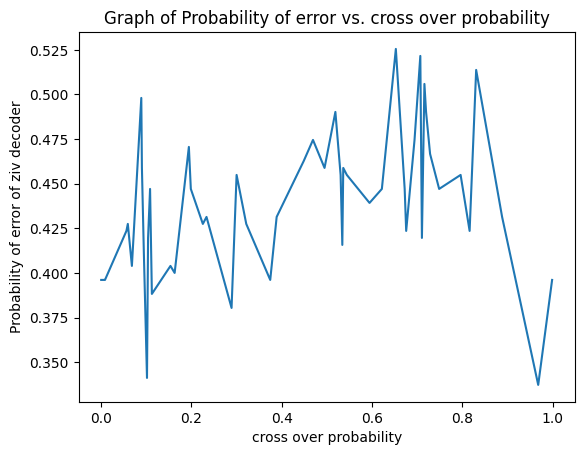

In [99]:
encoded_message =np.concatenate([ codebook[2], codebook[0], codebook[1],codebook[3],codebook[2], codebook[0], codebook[1],codebook[3], codebook[7],codebook[6], codebook[4],codebook[5],codebook[3], codebook[7],codebook[6], codebook[4],codebook[5] ])
cross_over = sorted([random.uniform(0, 1) for _ in range(50)])
n=len(encoded_message)
P_err_ziv=[]
for i in cross_over:
    received_message = noisy_channel(encoded_message, i)
    #ZIV
    y_ziv=[]
    for j in range(len(received_message)//15):
        u=[]
        for x in codebook:
            u.append(univ_dec(15,received_message[j*15:(j+1)*15-1],x))
        min_index = u.index(min(u))
        y_ziv=np.concatenate([y_ziv, codebook[min_index]])
    P_err_ziv.append(np.sum(encoded_message!=y_ziv)/len(y_ziv))
    
    #MMI

print(P_err_ziv)
# plot the graph
plt.plot(cross_over, P_err_ziv)

# add labels and title
plt.xlabel('cross over probability')
plt.ylabel('Probability of error of ziv decoder')
plt.title('Graph of Probability of error vs. cross over probability')

# display the graph
plt.show()
  


In [91]:
import numpy as np

def viterbi_decoder(received_message, generator_matrix):
    """
    Performs maximum likelihood decoding on a convolutional code using the Viterbi algorithm.
    
    Parameters:
        received_message (numpy.ndarray): A 2D array of shape (num_states, message_length), where num_states is the
            number of possible states in the convolutional code (usually 2^(k-1) for a kth-order code), and message_length
            is the length of the received message. Each row of the array represents a possible state, and each column
            represents a received bit in the message.
        generator_matrix (numpy.ndarray): A 2D array of shape (num_outputs, k), where num_outputs is the number of outputs
            from the convolutional encoder (usually 2 for a binary code), and k is the number of input bits to the encoder.
            The rows of the matrix represent the outputs for each possible input bit sequence of length k.
    
    Returns:
        numpy.ndarray: A 1D array of length message_length containing the decoded message.
    """
    num_states, message_length = received_message.shape
    
    # Initialize the path metrics and survivor paths
    path_metrics = np.zeros((num_states, message_length))
    survivor_paths = np.zeros((num_states, message_length), dtype=int)
    
    # Set the initial path metric to 0 for the all-zero state and infinity for all other states
    path_metrics[:, 0] = np.inf
    path_metrics[0, 0] = 0
    
    # Iterate over the received bits in the message
    for t in range(1, message_length):
        # Iterate over the possible current states
        for s in range(num_states):
            # Compute the branch metrics for each possible input bit sequence
            branch_metrics = np.zeros(2)
            for i in range(2):
                input_bits = np.concatenate(([i], received_message[s, t-1:t]))
                output_bits =(generator_matrix * input_bits) % 2
                branch_metrics[i] = np.sum(output_bits != received_message[:, t])
            
            # Compute the path metrics and survivor paths for each possible previous state
            prev_path_metrics = path_metrics[:, t-1]
            prev_survivor_paths = np.tile(np.arange(num_states), (2, 1)).T
            prev_survivor_paths[:, 0] = np.repeat(s, num_states)
            path_metrics[:, t] = np.min(prev_path_metrics + branch_metrics)
            survivor_paths[:, t] = prev_survivor_paths[np.argmin(prev_path_metrics + branch_metrics)]
    
    # Find the survivor path with the minimum path metric
    best_path_end = np.argmin(path_metrics[:, -1])
    decoded_message = np.zeros(message_length, dtype=int)
    decoded_message[-1] = best_path_end
    for t in range(message_length-2, -1, -1):
        decoded_message[t] = survivor_paths[decoded_message[t+1], t+1]
    
    return decoded_message


In [92]:
# example usage

decoded_message = viterbi_decoder(received_message, coefficients)
print(decoded_message)


ValueError: operands could not be broadcast together with shapes (3,3) (2,) 